In [66]:
%matplotlib inline
import pickle
import pandas as pd
import numpy as np

#sklearn - Machine Learning Package
import sklearn.model_selection as modsel
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

#XGBoost
import xgboost as xgb

import matplotlib.pyplot as plt
import matplotlib.cm as cm


### Load Data Files

In [11]:
train_filename = 'block_1.csv'
DT_train = pd.read_csv(train_filename,na_values='?')
DT_train=DT_train.fillna(value = -1)

test_filenames = ['block_2.csv','block_3.csv','block_4.csv',
            'block_5.csv','block_6.csv','block_7.csv','block_8.csv',
            'block_9.csv','block_10.csv']

DT_test_list = []

for i in test_filenames:
    DT_test_list.append(pd.read_csv(i,na_values='?'))

for i in np.arange(len(DT_test_list)):
    DT_test_list[i]=DT_test_list[i].fillna(value = -1)

### Create Test Sets

In [13]:
str_preds = DT_test_list[0].columns[2:-1]
str_output = 'is_match'

#Train Set
X_train = DT_train[str_preds]
y_train = DT_train[str_output]

#Test Set
X_test_list = []
y_test_list = []
for i in DT_test_list:
    X_test_list.append(i[str_preds])
    y_test_list.append(i[str_output])

### Specify Training HyperParameters

In [80]:
param = {'learning_rate':[0.001,0.01,0.1],
            'max_depth':[2,3,4],
            'n_estimators':[50,100,150]}

#scikit-learn API for Boosting Parameters for Tree Booster
max_depth = 2
learning_rate = 0.1
n_estimators=100
silent = False
objective='binary:logistic'
booster = 'gbtree'
nthread = 1
n_jobs = 1
gamma = 0
min_child_weight=1
max_delta_step=0
subsample=1
colsample_bytree=1
colsample_bylevel=1
reg_alpha=0
reg_lambda=1
scale_pos_weight=1
base_score=0.5
seed=1234

eval_metric='logloss'

### Instantiate XGBoost Model & Grid Sweep

In [81]:
model_xgb_class = xgb.XGBClassifier(silent =silent,
                                #max_depth=max_depth,
                                #learning_rate = learning_rate,
                                #n_estimators = n_estimators,
                                objective=objective,
                                nthread=nthread,
                                gamma = gamma,
                                min_child_weight = min_child_weight,
                                max_delta_step = max_delta_step,
                                subsample = subsample,
                                colsample_bytree= colsample_bytree,
                                colsample_bylevel=colsample_bylevel,
                                reg_alpha=reg_alpha,
                                reg_lambda=reg_lambda,
                                scale_pos_weight=scale_pos_weight,
                                base_score=base_score,
                                seed=seed)

grid_CV = GridSearchCV(model_xgb_class, param,verbose=2)

### Save Results & Final Model

In [89]:
tuning_file = 'UCI_xgboost_sweep_results.pkl'
pickle.dump(grid_CV,open(tuning_file, "wb"))

final_model_file = 'UCI_xgboost_model.pkl'
pickle.dump(grid_CV.best_estimator_,open(final_model_file, "wb"))

### Run Sweep

In [82]:
#- Note: This takes a very long time. 
#- Comment these 2 lines before running.
grid_CV.fit(X_train, y_train)


#model_xgb_class.fit(X_train,y_train,
#                    eval_set=[(X_train, y_train),
#                    (X_test_list[0], y_test_list[0])],
#                    eval_metric=eval_metric,
#                     verbose=True)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] n_estimators=50, learning_rate=0.001, max_depth=2 ...............
[CV]  n_estimators=50, learning_rate=0.001, max_depth=2, total=   3.6s
[CV] n_estimators=50, learning_rate=0.001, max_depth=2 ...............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.8s remaining:    0.0s


[CV]  n_estimators=50, learning_rate=0.001, max_depth=2, total=   3.7s
[CV] n_estimators=50, learning_rate=0.001, max_depth=2 ...............
[CV]  n_estimators=50, learning_rate=0.001, max_depth=2, total=   3.9s
[CV] n_estimators=100, learning_rate=0.001, max_depth=2 ..............
[CV]  n_estimators=100, learning_rate=0.001, max_depth=2, total=   6.6s
[CV] n_estimators=100, learning_rate=0.001, max_depth=2 ..............
[CV]  n_estimators=100, learning_rate=0.001, max_depth=2, total=   6.8s
[CV] n_estimators=100, learning_rate=0.001, max_depth=2 ..............
[CV]  n_estimators=100, learning_rate=0.001, max_depth=2, total=   7.3s
[CV] n_estimators=150, learning_rate=0.001, max_depth=2 ..............
[CV]  n_estimators=150, learning_rate=0.001, max_depth=2, total=  10.5s
[CV] n_estimators=150, learning_rate=0.001, max_depth=2 ..............
[CV]  n_estimators=150, learning_rate=0.001, max_depth=2, total=  10.6s
[CV] n_estimators=150, learning_rate=0.001, max_depth=2 ..............
[

[CV] . n_estimators=100, learning_rate=0.1, max_depth=2, total=   7.7s
[CV] n_estimators=150, learning_rate=0.1, max_depth=2 ................
[CV] . n_estimators=150, learning_rate=0.1, max_depth=2, total=  11.3s
[CV] n_estimators=150, learning_rate=0.1, max_depth=2 ................
[CV] . n_estimators=150, learning_rate=0.1, max_depth=2, total=  11.5s
[CV] n_estimators=150, learning_rate=0.1, max_depth=2 ................
[CV] . n_estimators=150, learning_rate=0.1, max_depth=2, total=  11.8s
[CV] n_estimators=50, learning_rate=0.1, max_depth=3 .................
[CV] .. n_estimators=50, learning_rate=0.1, max_depth=3, total=   5.1s
[CV] n_estimators=50, learning_rate=0.1, max_depth=3 .................
[CV] .. n_estimators=50, learning_rate=0.1, max_depth=3, total=   5.1s
[CV] n_estimators=50, learning_rate=0.1, max_depth=3 .................
[CV] .. n_estimators=50, learning_rate=0.1, max_depth=3, total=   5.2s
[CV] n_estimators=100, learning_rate=0.1, max_depth=3 ................
[CV] .

[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed: 12.2min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=1234, silent=False, subsample=1),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [50, 100, 150], 'learning_rate': [0.001, 0.01, 0.1], 'max_depth': [2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=2)

#### Inspect Model Convergence

In [84]:
best_xgb = grid_CV.best_estimator_
best_xgb

#a=best_xgb.evals_result()
#dict_logloss1=a['validation_0']
#a_vals=dict_logloss1['logloss']

#plt.plot(a_vals)
#plt.title('XGBoost Training Convergence')
#plt.xlabel('Boosting Iterations')
#plt.ylabel('LogLoss')
#plt.show()

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=2,
       min_child_weight=1, missing=None, n_estimators=150, nthread=1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=1234, silent=False, subsample=1)

### Model Validation - Training Data ROC Curve

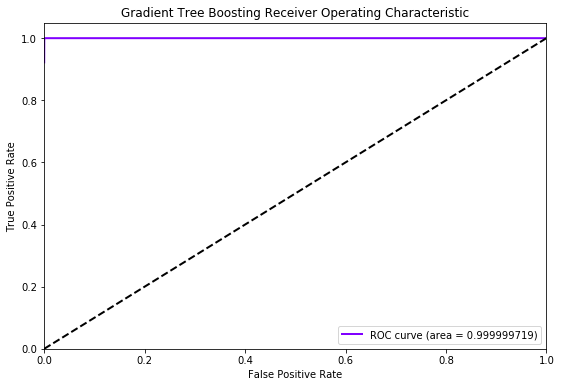

Mean Logit AUC: 0.999999719329
Average Misclassifications per Million Samples: 0.280671081043


In [85]:
fpr=[]
tpr=[]
auc=[]
thresh=[]

fpr_temp=[]
tpr_temp=[]
thresh_temp=[]
auc_temp=[]

#Calculate Probabilities for Class 1
test_probs = best_xgb.predict_proba(X_train)[:,1]

#Calculate FPR and TPR for Difference Thresholds
fpr_temp, tpr_temp,thresh_temp = metrics.roc_curve(y_true=y_train,y_score = test_probs)

#Calculate AUC for ROC
auc_temp = metrics.roc_auc_score(y_true=y_train,y_score = test_probs)

fpr.append(fpr_temp)
tpr.append(tpr_temp)
thresh.append(thresh_temp)
auc.append(auc_temp)

plt.figure(figsize=(9,6))

colors = iter(cm.rainbow(np.linspace(0, 1, 10)))
for i in np.arange(len(fpr)):
    plt.plot(fpr[i], tpr[i], lw=2,color=next(colors), label='ROC curve (area = %0.9f)' % auc[i])


plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Tree Boosting Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

print('Mean Logit AUC: %s' % np.mean(auc))
print('Average Misclassifications per Million Samples: %s' % ((1.0-np.mean(auc))*1000000.0))

### Model Validation - Test Data ROC Curve

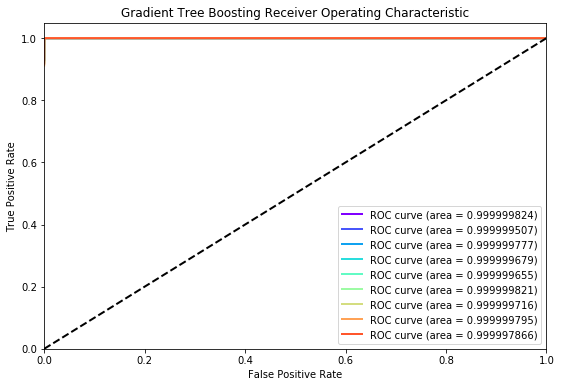

Mean Logit AUC: 0.999999515504
Average Misclassifications per Million Samples: 0.484496154751


In [86]:
fpr=[]
tpr=[]
auc=[]
thresh=[]

fpr_temp=[]
tpr_temp=[]
thresh_temp=[]
auc_temp=[]
for i in np.arange(len(X_test_list)):
    #Calculate Probabilities for Class 1
    test_probs = best_xgb.predict_proba(X_test_list[i])[:,1]

    #Calculate FPR and TPR for Difference Thresholds
    fpr_temp, tpr_temp,thresh_temp = metrics.roc_curve(y_true=y_test_list[i],y_score = test_probs)

    #Calculate AUC for ROC
    auc_temp = metrics.roc_auc_score(y_true=y_test_list[i],y_score = test_probs)

    fpr.append(fpr_temp)
    tpr.append(tpr_temp)
    thresh.append(thresh_temp)
    auc.append(auc_temp)


plt.figure(figsize=(9,6))

colors = iter(cm.rainbow(np.linspace(0, 1, 10)))
for i in np.arange(len(fpr)):
    plt.plot(fpr[i], tpr[i], lw=2,color=next(colors), label='ROC curve (area = %0.9f)' % auc[i])


plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Tree Boosting Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

print('Mean Logit AUC: %s' % np.mean(auc))
print('Average Misclassifications per Million Samples: %s' % ((1.0-np.mean(auc))*1000000.0))

### Variable Importance - XGBoost Model

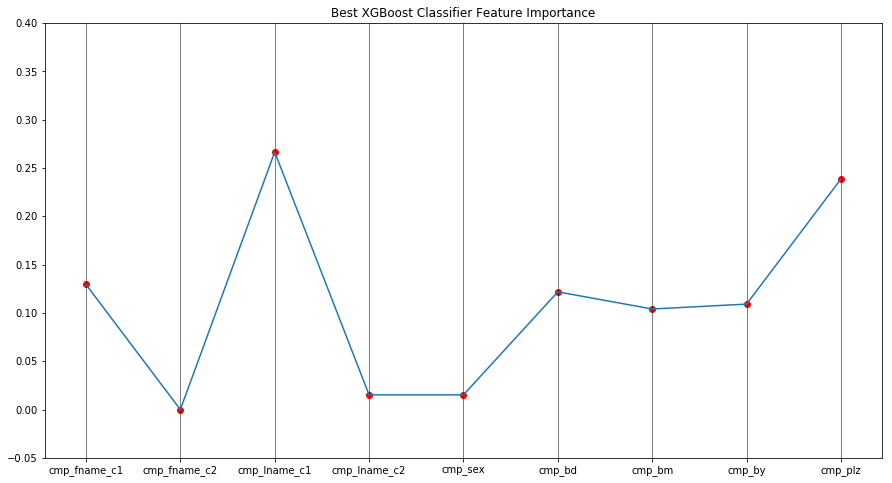

In [88]:
plt.figure(figsize=(15,8))
plt.plot(best_xgb.feature_importances_)
plt.scatter(range(X_test_list[1].shape[1]),best_xgb.feature_importances_,color='red')
plt.xticks(range(X_test_list[1].shape[1]), X_test_list[1].columns)
plt.vlines(range(X_test_list[1].shape[1]),-.1,0.4,lw=0.5)
plt.ylim(-.05,0.4)
plt.title('Best XGBoost Classifier Feature Importance')
plt.show()